In [20]:
from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

In [21]:
model = load_model("output/my_model5")

model.summary()

Model: "Image_Recognition_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 Normaliser (Rescaling)      (None, 32, 32, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 48)        13872     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 48)         0         
 2D)                                       

In [22]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [23]:
def reshape_image(data):
    data = np.reshape(data, (3,32,32))
    data = np.moveaxis(data, 0, -1)

    return data

In [24]:
def filter_classes(batch, label):
    x = []
    y = []

    true_count = 0
    false_count = 0

    labels = np.array([int(i == label) for i in batch[b'labels']])

    _, counts = np.unique(labels, return_counts=True)
    n = min(counts)

    for i in range(len(batch[b'data'])):
        if batch[b'labels'][i] == label:
            if true_count < n:
                x.append(reshape_image(batch[b'data'][i]))
                y.append(1)
                true_count += 1
        else:
            if false_count < n:
                x.append(reshape_image(batch[b'data'][i]))
                y.append(0)
                false_count += 1

    return np.array(x), np.array(y)

In [25]:
test_batch = unpickle('cifar-10-batches-py/test_batch')

In [26]:
test_x, test_y = filter_classes(test_batch, 0)

In [27]:
model.evaluate(test_x, test_y)

63/63 [==============================] - 1s 11ms/step - loss: 0.2218 - accuracy: 0.9135


[0.22181959450244904, 0.9135000109672546]

In [28]:
def probability(model, data):
    return np.array(tf.nn.softmax(model.predict(data.reshape(1,32,32,3)))).reshape(2,)

def show_image(axs, data):
    axs.imshow(data)
    axs.axis('off')

def print_results(prob):
    if prob[0] > 0.5:
        print("This image is most likely not a plane with {:.2f} percent confidence.".format(prob[0]*100))
    else:
        print("This image is most likely a plane with {:.2f} percent confidence.".format(prob[1]*100))

1/1 [==============================] - 0s 130ms/step
This image is most likely not a plane with 99.95 percent confidence.


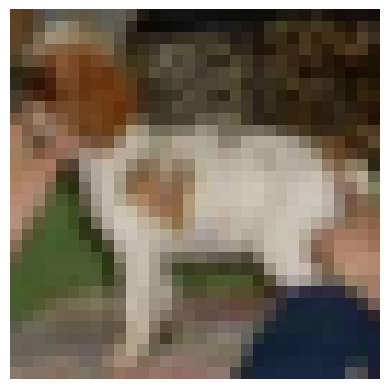

In [29]:
chosen_index = 12
prob = probability(model, test_x[chosen_index])
show_image(plt, test_x[chosen_index])
print_results(prob)

1/1 [==============================] - 0s 25ms/step
This image is most likely a plane with 97.44 percent confidence.


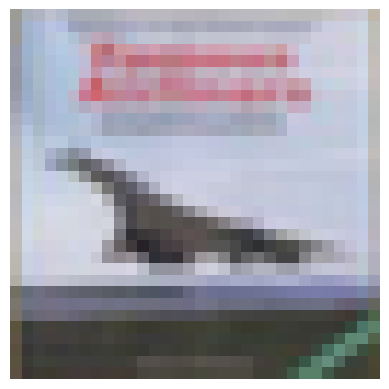

In [30]:
i = 0
count = 0
while not test_y[i]:
    i += 1
prob = probability(model, test_x[i])
print_results(prob)
show_image(plt, test_x[i])

In [31]:
from PIL import Image
from urllib.request import urlopen

def evaluate_image(model, url):
    img = Image.open(urlopen(url))
    img_resized = np.asarray(img.resize((32, 32)))
    
    prob = probability(model, img_resized)

    show_image(plt, img_resized)

    print_results(prob)
    

1/1 [==============================] - 0s 26ms/step
This image is most likely a plane with 99.98 percent confidence.


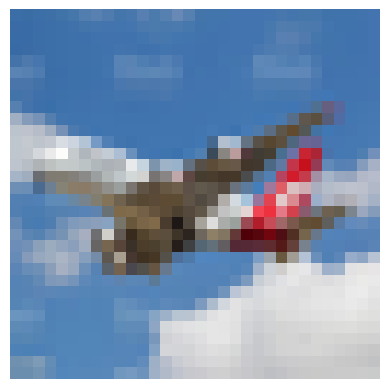

In [32]:
evaluate_image(model, "https://media.istockphoto.com/id/501147980/es/foto/qantas-airways-airbus-a380-vh-oqf-despegar.webp?s=612x612&w=is&k=20&c=G0_4dlCUzEatl6ytQ7yOjzU2zn0HL6_XQ3_WaF2Jmzk=")

1/1 [==============================] - 0s 23ms/step
This image is most likely not a plane with 90.12 percent confidence.


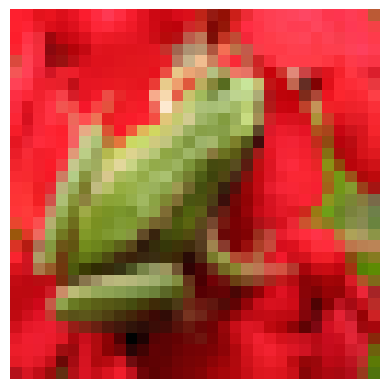

In [33]:
evaluate_image(model, "https://images.freeimages.com/images/large-previews/566/green-frog-1361810.jpg")

1/1 [==============================] - 0s 27ms/step
This image is most likely not a plane with 80.86 percent confidence.


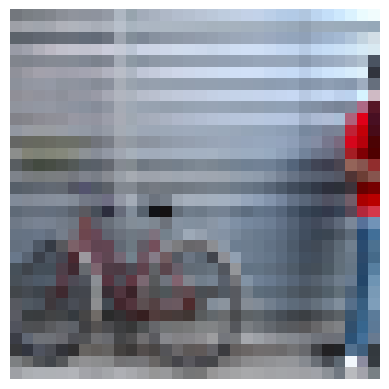

In [34]:
evaluate_image(model, "https://images.freeimages.com/images/large-previews/70b/bike-red-1423575.jpg")

1/1 [==============================] - 0s 23ms/step
This image is most likely a plane with 100.00 percent confidence.


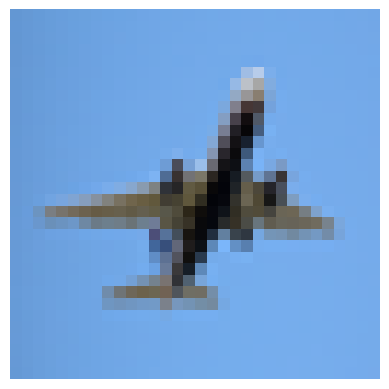

In [35]:
evaluate_image(model, "https://images.freeimages.com/images/large-previews/429/plane-1449679.jpg")

1/1 [==============================] - 0s 23ms/step
This image is most likely not a plane with 89.08 percent confidence.


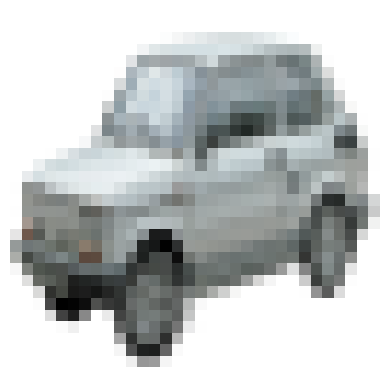

In [36]:
evaluate_image(model, "https://images.freeimages.com/images/large-previews/e07/car-1568850.jpg")